In [1]:
import cv2 
print(cv2.__version__)

3.4.3


In [2]:
import matplotlib.pyplot as plt
import numpy as np

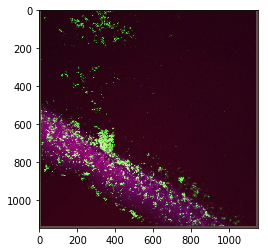

In [3]:
tb = cv2.imread("tb_tristain.png")
plt.imshow(tb)
plt.show()

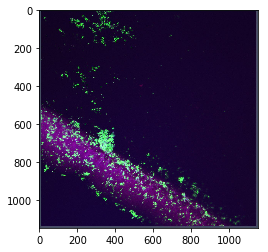

In [4]:
tb = cv2.cvtColor(tb, cv2.COLOR_BGR2RGB)
plt.imshow(tb)
plt.show()

In [14]:
from tkinter import *
import PIL.Image, PIL.ImageTk

tb_pillow = PIL.Image.open("tb_tristain.png")
tb = cv2.cvtColor(cv2.imread("tb_tristain.png"),cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(tb, cv2.COLOR_RGB2HSV)
root = Tk()
cv_img = cv2.cvtColor(cv2.imread("tb_tristain.png"), cv2.COLOR_BGR2RGB)
photo = PIL.ImageTk.PhotoImage(image = PIL.Image.fromarray(cv_img))
label = Label(root, image = photo)
label.pack()


def get_values(event):
    x,y = event.x, event.y
    r, g, b = tb_pillow.getpixel((x, y))
    print('RGB : '+'{},{},{}'.format(r,g,b))
    print("HSV : ",hsv[y, x])
    print("X:",x,"Y:",y)
root.bind("<Button 1>",get_values)

root.mainloop()


RGB : 23,4,49
HSV :  [133 234  49]
X: 246 Y: 543
RGB : 22,2,51
HSV :  [132 245  51]
X: 327 Y: 597
RGB : 16,0,36
HSV :  [133 255  36]
X: 23 Y: 411


green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)
https://docs.opencv.org/3.2.0/df/d9d/tutorial_py_colorspaces.html\

Red = [[[ 0 255 255  ]]]

In [15]:
hsv_tb = cv2.cvtColor(tb, cv2.COLOR_RGB2HSV)

In [11]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV) 
print(hsv_green) 

[[[ 60 255 255]]]


In [13]:
green_min = (50,50,50)
green_max = (70,255,255)

In [16]:
mask = cv2.inRange(hsv_tb, green_min, green_max)

In [17]:
result = cv2.bitwise_and(tb, tb, mask=mask)

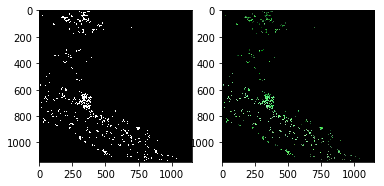

In [18]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [25]:
gray_image = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

## threshold
th, threshed = cv2.threshold(gray_image, 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## findcontours
_,cnts,_ = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


## filter by area
s1= 20
s2 = 800
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Dots number: {}".format(len(xcnts)))

Dots number: 708
